The goal of this notebook is to study the most efficient threshold to apply as a minimum score that answers must respect before being retrieved by the chatbot. The most important output here is is to check whether perfomance drops significantly at a given threshold level (elbow graph).

This reflects our study on the top_k_reader parameter. The evaluation of the top_k_retriever parameter is reflected on the "evaluation_topkretriever" notebook, in which we used **the best threshold, which was found at the end of this notebook**.

---

In [2]:
import pandas as pd
import ast

In [3]:
result = pd.read_csv('../../data/final_data/model_validation/Model_Validation.csv')
result.head(5)

Unnamed: 0                                     QUERY/PERGUNTA  \
0           3  Como se conta o tempo  de serviço em acumulaçã...   
1          10  Quando deve ser apresentado o requerimento par...   
2          13       Quem pode requerer a aposentação antecipada?   
3          16              Quem aplica a aposentação compulsiva?   
4          17              Quando existe aposentação compulsiva?   

                  TÓPICO                                            RESPOSTA  \
0    ACUMULAÇÃO DE CARGOS  O tempo de serviço prestado  simultâneamente e...   
1            ANTECEDÊNCIA  O pedido de aposentação pode ser apresentado c...   
2  APOSENTAÇÃO ANTECIPADA  Podem requerer a aposentação antecipada, indep...   
3  APOSENTAÇÃO COMPULSIVA  A aposentação compulsiva é aplicada por decisã...   
4  APOSENTAÇÃO COMPULSIVA  A aplicação desta pena só terá lugar quando a ...   

   ARTIGO RESPOSTA2 ARTIGO2 RESPOSTA3 ARTIGO3 RESPOSTA4 ARTIGO4 RESPOSTA5  \
0    31.º       NaN     NaN       NaN     NaN       NaN     NaN       NaN   
1    39.º       NaN     NaN       NaN     NaN       NaN     NaN       NaN   
2  37.º-A       NaN     NaN       NaN     NaN       NaN     NaN       NaN   
3    42.º       NaN     NaN       NaN     NaN       NaN     NaN       NaN   
4    42.º       NaN     NaN       NaN     NaN       NaN     NaN       NaN   

  ARTIGO5 RESPOSTA6 ARTIGO6  \
0     NaN       NaN     NaN   
1     NaN       NaN     NaN   
2     NaN       NaN     NaN   
3     NaN       NaN     NaN   
4     NaN       NaN     NaN   

                        ESTATUTO EXTERNO RELACIONADO Combined  
0          Lei Geral do Trabalho em Funções Públicas   ['31']  
1                                                NaN   ['39']  
2                                                NaN  ['37A']  
3  Lei Geral do Trabalho em Funções Públicas\r\nA...   ['42']  
4                                                NaN   ['42']

In [4]:
# Importing the predictions from our model, obtained by running the model for all queries in the validation dataset and transformed into a
# csv file so that we don't have to run 186 queries each time

predictions_df = pd.read_csv('../../data/final_data/model_validation/predictions.csv', index_col = 0)
predictions_df.head(5)

0  \
0  {'answer': 'por acréscimo ao tempo de subscrit...   
1  {'answer': 'dois anos após a aplicação da pena...   
2  {'answer': 'os subscritores que tenham, pelo m...   
3  {'answer': 'pelo competente órgão \n\nsuperior...   
4  {'answer': 'quando resulta de simples determin...   

                                                   1  \
0  {'answer': 'não é contado cumulativamente', 's...   
1  {'answer': 'quando a cessação definitiva de fu...   
2  {'answer': 'pelo interessado', 'score': 8.2710...   
3  {'answer': 'autoridade competente', 'score': 6...   
4  {'answer': 'quando o subscritor, tendo, pelo m...   

                                                   2  \
0  {'answer': 'Não será contado', 'score': 6.0399...   
1  {'answer': 'no prazo que, para o efeito, a\n\n...   
2  {'answer': 'pelo subscritor', 'score': 6.95722...   
3  {'answer': 'lei especial', 'score': 6.42457056...   
4  {'answer': 'quando o subscritor, tendo, pelo m...   

                                                   3  \
0  {'answer': 'no cálculo da pensão inicial', 'sc...   
1  {'answer': 'quando tem lugar a requerimento do...   
2  {'answer': 'pelo competente órgão \n\nsuperior...   
3  {'answer': 'Caixa', 'score': 4.709192276000977...   
4  {'answer': 'quando se trate de tempo não sobre...   

                                                   4  
0  {'answer': 'levadas em conta na atribuição \n\...  
1  {'answer': 'à data em \n\nque seja recebido o ...  
2  {'answer': 'do subscritor', 'score': 3.7441892...  
3  {'answer': 'Caixa', 'score': 1.008574008941650...  
4  {'answer': 'Quando a eliminação da qualidade d...

## Threshold-based

In [7]:
# This has been converted into a function on the "functions" folder

import numpy as np 

pred_articles_list = []
threshold = 6

for query in predictions_df.index:
    temp_list = []
    for answer in range(5):
        if ast.literal_eval(predictions_df.iloc[query][answer])['score'] >= threshold:
            temp_list.append(ast.literal_eval(predictions_df.iloc[query][answer])['meta']['article'])
        if len(temp_list) == 3:
            pred_articles_list.append(temp_list)
            break
        if answer == 4:
            pred_articles_list.append(temp_list)

In [8]:
answers_list = list(result['Combined'].iloc[:])

cnt = 0
for ind in range(len(pred_articles_list)):
    #print(pred_articles_list[ind][0],answers_list[ind])
    if len(pred_articles_list[ind]) == 0:
        pass
    elif any((True for x in pred_articles_list[ind][0:len(pred_articles_list[ind])] if x in ast.literal_eval(answers_list[ind]))):
        cnt+=1
    print(ind, cnt, pred_articles_list[ind], ast.literal_eval(answers_list[ind]))
    
accuracy_em = cnt/len(pred_articles_list)*100

print('Exact Match accuracy is: ', round(accuracy_em,0),'%')

0 1 ['25', '31', '27'] ['31']
1 1 ['40'] ['39']
2 2 ['37A', '34', '39'] ['37A']
3 3 ['41', '42', '45'] ['42']
4 3 ['36'] ['42']
5 4 ['56', '57', '49'] ['56']
6 5 ['78'] ['78']
7 6 ['40', '78', '76'] ['78']
8 7 ['36', '40'] ['36']
9 7 ['36', '41'] ['37']
10 7 ['36', '39', '25A'] ['37', '41']
11 8 ['100', '40', '36'] ['36']
12 8 ['82', '43', '37'] ['39']
13 8 ['41', '38A', '80'] ['39']
14 9 ['43', '11', '36'] ['43']
15 9 ['57', '6B', '120'] ['59']
16 9 ['70', '6A'] ['59']
17 10 ['63', '141', '83'] ['63']
18 11 ['78', '78', '137'] ['78']
19 11 ['10', '6A', '6B'] ['13']
20 12 ['37B', '34', '39'] ['37B']
21 13 ['82', '37B'] ['37B']
22 13 ['74', '25A'] ['37B']
23 13 ['26', '29'] ['33', '80']
24 13 ['80'] []
25 13 ['140', '63A', '111'] ['6A']
26 13 ['140'] ['139']
27 13 ['5', '25', '42'] ['67']
28 13 ['57', '115'] ['53']
29 14 ['76', '40'] ['76']
30 15 ['66', '74', '6B'] ['74']
31 15 [] ['37A']
32 15 ['37', '44', '135'] ['73', '37B', '38', '39']
33 15 ['36', '38A', '11'] ['39']
34 16 ['34', '

---

In [9]:
len_list = []
for pred in pred_articles_list:
    len_list.append(len(pred))
    
average_pred_len = np.mean(len_list)

print(f"Average returned articles are: {average_pred_len}")

Average returned articles are: 2.247311827956989


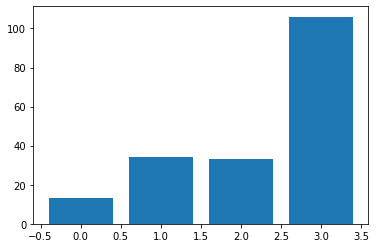

In [10]:
import matplotlib.pyplot as plt

plt.bar(range(4), [len_list.count(i) for i in range(4)])
plt.show()

In [11]:
accuracy_rnd = []

for threshold in range(1,13): 
    pred_articles_list = []

    for query in predictions_df.index:
        temp_list = []
        for answer in range(5):
            if ast.literal_eval(predictions_df.iloc[query][answer])['score'] >= threshold:
                temp_list.append(ast.literal_eval(predictions_df.iloc[query][answer])['meta']['article'])
            if len(temp_list) == 3:
                pred_articles_list.append(temp_list)
                break
            if answer == 4:
                pred_articles_list.append(temp_list)

    answers_list = list(result['Combined'].iloc[:])

    cnt = 0
    for ind in range(len(pred_articles_list)):
        #print(pred_articles_list[ind][0],answers_list[ind])
        if len(pred_articles_list[ind]) == 0:
            pass
        elif any((True for x in pred_articles_list[ind][0:len(pred_articles_list[ind])] if x in ast.literal_eval(answers_list[ind]))):
            cnt+=1
        #print(ind, cnt, pred_articles_list[ind], ast.literal_eval(answers_list[ind]))

    accuracy_em = cnt/len(pred_articles_list)*100
    
    accuracy_rnd.append(round(accuracy_em,0))

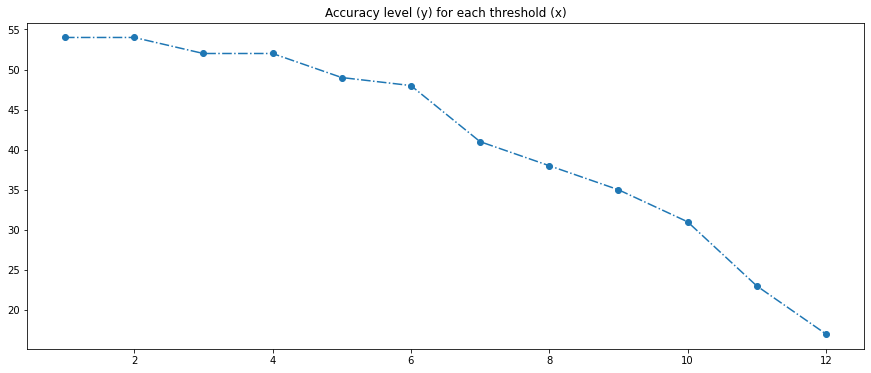

In [12]:
plt.figure(figsize=(15,6))
plt.plot(range(1,13), accuracy_rnd, '-.',
         marker='o')
plt.title('Accuracy level (y) for each threshold (x)')
plt.show()

The "elbow point" is clearly threshold=6, which is why we selected that as the best threshold. This study is expanded in the deliverable "Evaluation&Selection"